# Machine Learning Insurance Classification Final Project


##### **Authors:** Weronika Mądro, Zahra Eshtiaghi

## Loading the libraries and the input data

The initial phase involves importing the required libraries that support data processing, exploratory analysis, and model development.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("insurance_train.csv")
test = pd.read_csv("insurance_test.csv")

## Exploratory Data Analysis

In [9]:
print(f"Number of observations: {len(train)}")
print(f"Number of columns: {len(train.columns)}")
train.head(5)

Number of observations: 56993
Number of columns: 14


,reward,claim_status,person_gender,entity_type,channel,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.284509,50b3e71e,51,united states,105.459587,SecurePlan Flex,21
1,18.428627,0,9b2d5b46,type_a,web,0,agt_0001,0.207538,96d6c6df,32,spain,30.433459,DriveSafe Rental Addon,6
2,0.000000,0,9b2d5b46,type_a,web,1,agt_0004,0.300461,50b3e71e,38,new zealand,78.728474,TripGuard Cancel,84
3,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.132404,50b3e71e,30,thailand,17.146843,TripGuard Cancel,39
4,0.000000,0,9b2d5b46,type_a,web,2,agt_0004,0.070443,50b3e71e,37,viet nam,10.476416,TripGuard Cancel,48


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56993 entries, 0 to 56992
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reward                56993 non-null  float64
 1   claim_status          56993 non-null  int64  
 2   person_gender         56993 non-null  object 
 3   entity_type           56993 non-null  object 
 4   channel               56993 non-null  object 
 5   support_interactions  56993 non-null  int64  
 6   agent_id              56993 non-null  object 
 7   customer_score        56993 non-null  float64
 8   entity_a              56993 non-null  object 
 9   person_age            56993 non-null  int64  
 10  location              56993 non-null  object 
 11  revenue               56993 non-null  float64
 12  product_id            56993 non-null  object 
 13  trip_length           56993 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 6.1+ MB


The train data sata consists of 56993 observations and 14 columns. Let's dive into what each column represents:
* reward - the monetary payout amount for each claim
* claim_status - binary target indicating whether a claim was made (1) or not (0)
* person_gender - the insured individual’s gender category 
* entity_type - classification of the policyholder
* channel - the sales or service channel through which the policy was sold or the claim was filed 
* support_interactions - number of customer-support touchpoints associated with the policy
* agent_id - unique identifier for the insurance agent managing this policy
* customer_score - a precomputed score reflecting the customer’s risk profile or satisfaction level
* entity_a - secondary entity code 
* person_age - age of the insured individual, in years
* location - geographic region or country associated with the policy
* revenue - total premium revenue paid for the policy
* product_id - identifier for the specific insurance product purchased
* trip_length - duration of coverage in days

In [ ]:
train.describe()

,reward,claim_status,support_interactions,customer_score,person_age,revenue,trip_length
count,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000
mean,9.794976,0.014633,1.093941,0.189540,39.697261,40.750070,49.234888
std,19.791119,0.120081,0.923113,0.080641,12.603433,48.749221,98.659469
min,0.000000,0.000000,0.000000,0.000000,18.000000,-406.642669,1.000000
25%,0.000000,0.000000,0.000000,0.136389,34.000000,18.246389,9.000000
50%,0.000000,0.000000,1.000000,0.181041,36.000000,26.785242,22.000000
75%,11.336612,0.000000,2.000000,0.230836,44.000000,47.809948,53.000000
max,282.073580,1.000000,6.000000,1.000000,100.000000,801.049866,4856.000000


For reward feature most observations have a reward of zero, but a long right‐tail of larger payouts drives the mean above zero. We will likely want to treat this as a highly skewed distribution.

Premium revenue is right‐skewed but also contains negative entries (refunds or adjustments).

While most coverages run a few weeks (median about 22 days), there are some extremely long durations—likely data errors or business‐special cases.

In [18]:
print(f"Number of observations: {len(test)}")
print(f"Number of columns: {len(test.columns)}")
test.head(5)

Number of observations: 6333
Number of columns: 13


,reward,person_gender,entity_type,channel,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,84.316320,9b2d5b46,type_a,web,2,agt_0001,0.009257,96d6c6df,31,ireland,-141.716239,DriveSafe Rental Addon,73
1,45.884363,9b2d5b46,type_a,web,0,agt_0001,0.108049,96d6c6df,29,australia,82.225268,DriveSafe Rental Addon,25
2,0.000000,9b2d5b46,type_a,web,2,agt_0004,0.108814,50b3e71e,26,indonesia,10.247118,TripGuard Cancel,6
3,29.363482,f67ab10a,type_b,web,1,agt_0002,0.215505,7b5dbb09,32,france,83.483247,TravelShield Value,73
4,12.440951,08f27188,type_b,web,0,agt_0005,0.194798,99ede4e4,26,singapore,46.679372,TravelShield Plus,32


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6333 entries, 0 to 6332
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reward                6333 non-null   float64
 1   person_gender         6333 non-null   object 
 2   entity_type           6333 non-null   object 
 3   channel               6333 non-null   object 
 4   support_interactions  6333 non-null   int64  
 5   agent_id              6333 non-null   object 
 6   customer_score        6333 non-null   float64
 7   entity_a              6333 non-null   object 
 8   person_age            6333 non-null   int64  
 9   location              6333 non-null   object 
 10  revenue               6333 non-null   float64
 11  product_id            6333 non-null   object 
 12  trip_length           6333 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 643.3+ KB


In [20]:
test.describe()

,reward,support_interactions,customer_score,person_age,revenue,trip_length
count,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000
mean,9.927110,1.082110,0.189212,39.732039,40.186708,50.146850
std,19.935225,0.932946,0.081027,12.653731,49.679302,126.641518
min,0.000000,0.000000,0.000000,18.000000,-274.049146,1.000000
25%,0.000000,0.000000,0.135322,34.000000,17.941783,10.000000
50%,0.000000,1.000000,0.179937,37.000000,26.315334,22.000000
75%,11.349123,2.000000,0.230329,43.000000,47.604193,52.000000
max,216.801798,5.000000,0.667037,100.000000,696.054514,4883.000000


Like the train set, most policies have zero payout; a right‐tail of larger rewards pulls the mean above zero.

### *Missing values*

In [11]:
train.isna().sum()

reward                  0
claim_status            0
person_gender           0
entity_type             0
channel                 0
support_interactions    0
agent_id                0
customer_score          0
entity_a                0
person_age              0
location                0
revenue                 0
product_id              0
trip_length             0
dtype: int64

In [17]:
test.isna().sum()

reward                  0
person_gender           0
entity_type             0
channel                 0
support_interactions    0
agent_id                0
customer_score          0
entity_a                0
person_age              0
location                0
revenue                 0
product_id              0
trip_length             0
dtype: int64

All features have zero missing values, the dataset is complete, so we can move further.

### *Explanatory Data Analysis*

For continuous or count data !!!!!!!!!!!!!!!!!!!!!!!!!!!

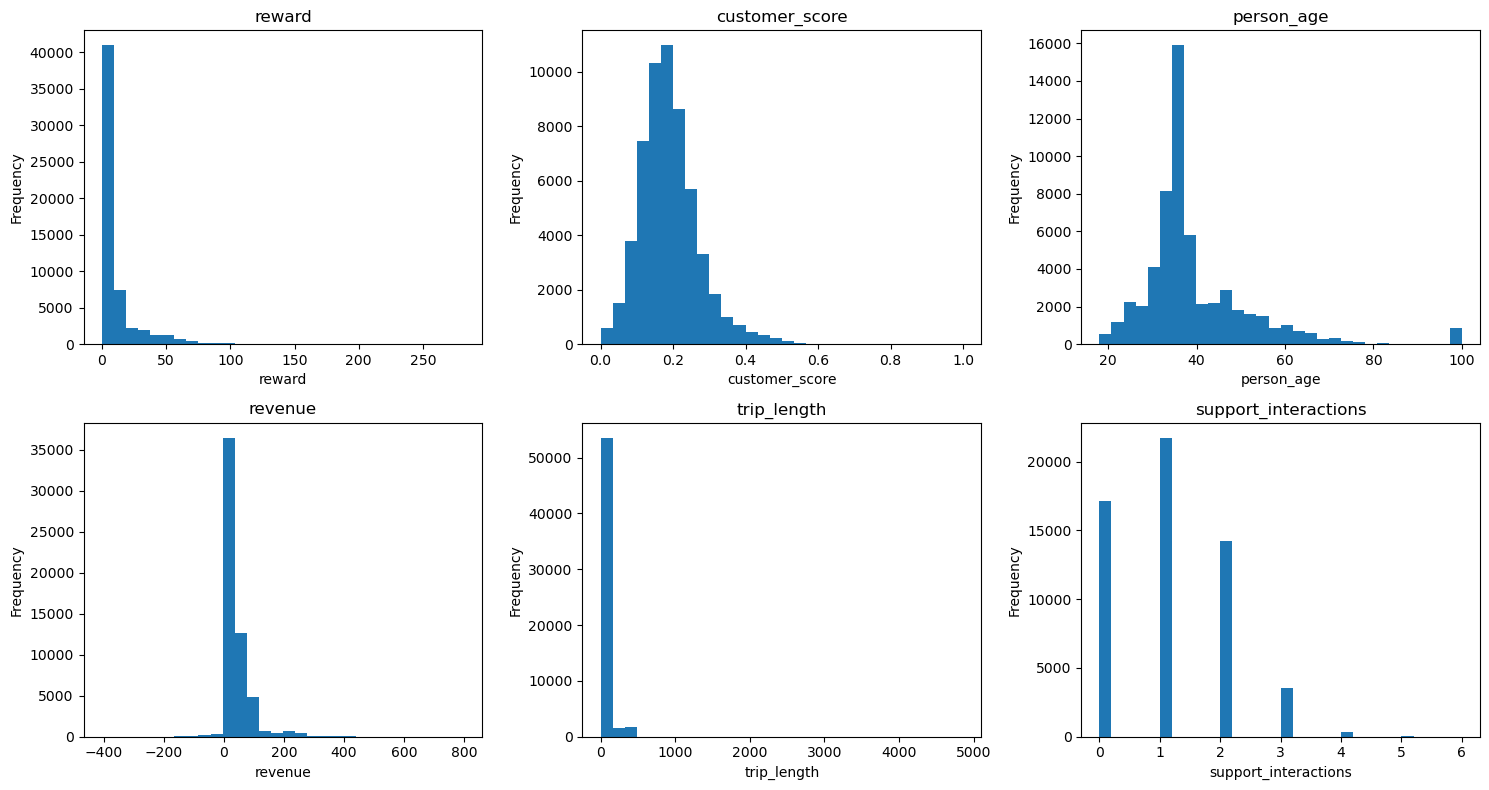

In [24]:
numeric_cols = [
    'reward',
    'customer_score',
    'person_age',
    'revenue',
    'trip_length',
    'support_interactions'
]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    ax.hist(train[col], bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()


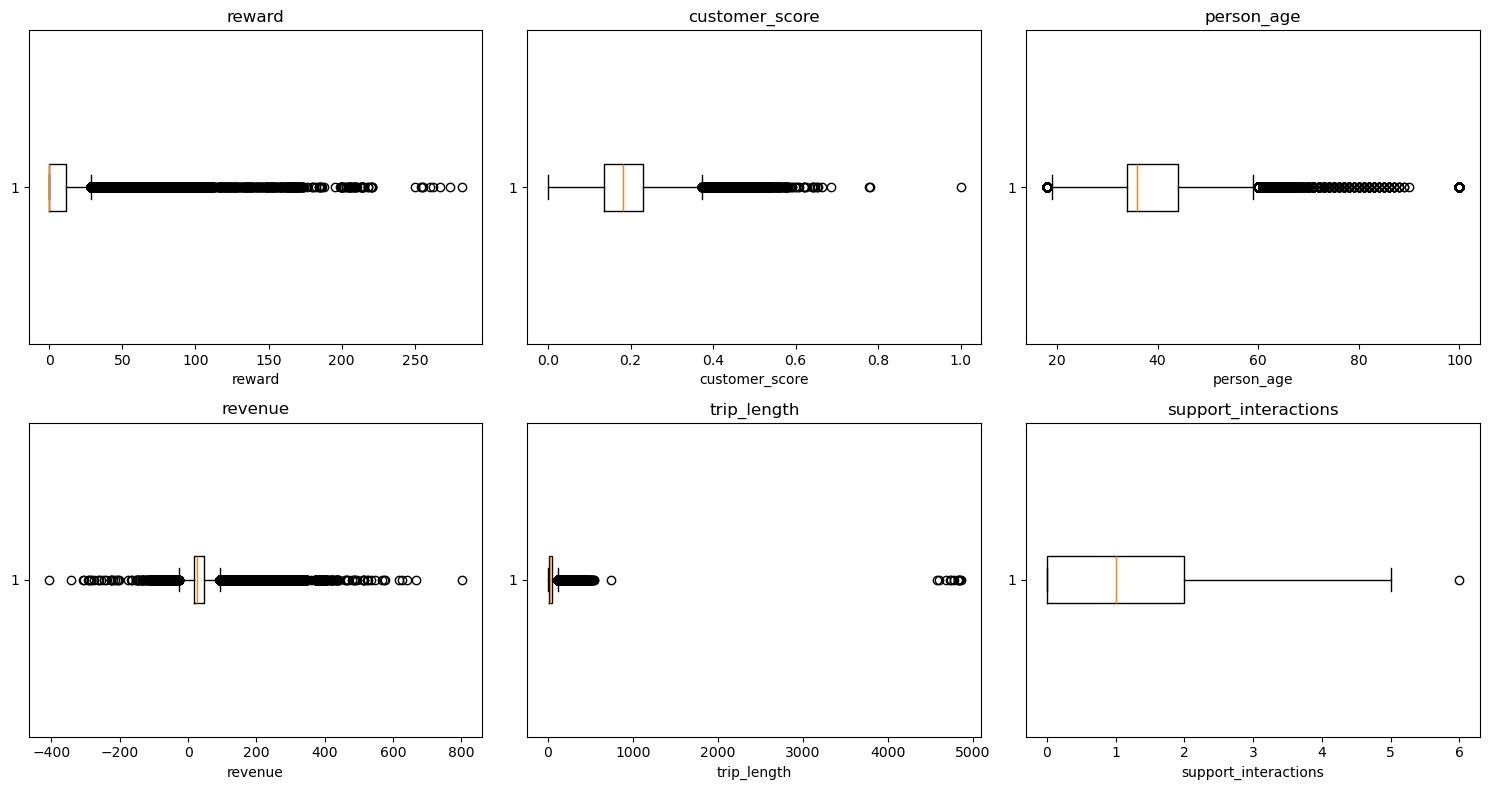

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    ax.boxplot(train[col], vert=False)
    ax.set_title(col)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

For categorical data............

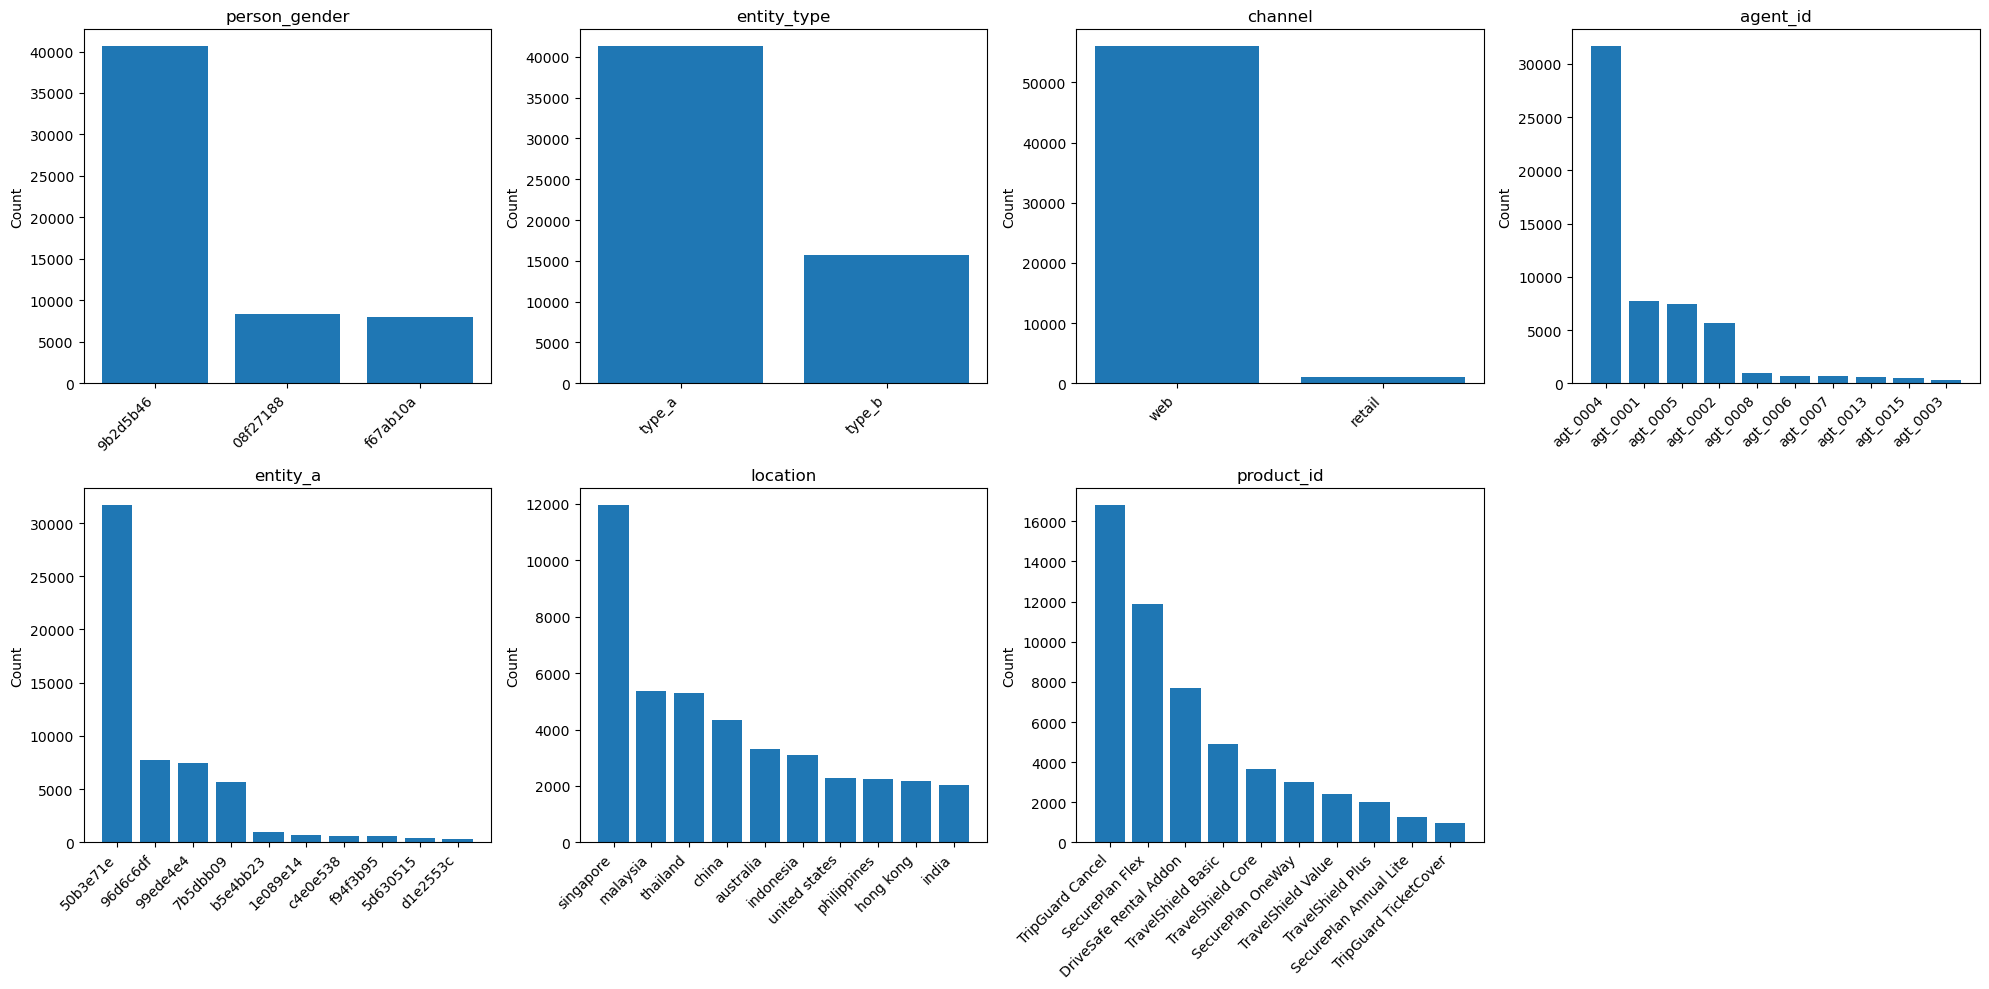

In [27]:
categorical_cols = [
    'person_gender',
    'entity_type',
    'channel',
    'agent_id',
    'entity_a',
    'location',
    'product_id'
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    counts = train[col].value_counts().head(10)
    # bar chart
    ax.bar(range(len(counts)), counts.values)
    # set both tick locations and labels
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
    ax.set_title(col)
    ax.set_ylabel('Count')

# remove the unused subplot if needed
if len(categorical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()